# 4장 : 신경망 학습
이번 장의 주제는 신경망 학습이다. 여기서 $\scriptsize \textbf{학습}$이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 $\scriptsize \textbf{손실 함수}$ 를 소개한다. 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다. 이번 장에서는 손실 함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 소개한다.

## 4.1 데이터에서 학습한다!
신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다. 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다. 아주 멋진 소식이다! 만약 모든 매개변수를 수작업으로 결정해야 한다고 상상해보자. 생각만 해도 끔찍하다. 이를테면 2장의 퍼셉트론 예에서 진리표를 보면서 사람이 수작업으로 매개변수 값을 설정하였었다. 하지만 이때는 매개변수가 겨우 3개였다. 자, 그렇다면 실제 신경망에서는 매개변수가 몇 개나 될것인가? 정답은 수천에서 수만이다. 나아가 층을 깊게 한 딥러닝 정도 되면 그 수는 수억에 이를 수도 있다.(($\scriptsize \text{거대 언어 모델}^{\text{Large Language Model}}$)) 이쯤 되면 (아니 훨씬 전부터) 매개변수를 수작업으로 정한다는 것은 아예 불가능하다. 이번 장에서는 신경망 학습 (데이터로부터 매개변수의 값을 정하는 방법)에 대해서 설명하고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해보자.

### 4.1.1 데이터 주도 학습
기계학습은 데이터가 생명이다. 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는, 그것이 바로 기계학습이다. 데이터가 없으면 아무것도 시작되지 않는다. 그래서 기계학습의 중심에는 $\scriptsize \textbf{데이터}$가 존대한다. 이처럼 데이터가 이끄는 접근 방식 덕에 사람 중심 접근에서 벗어날 수 있었다.     

그런데 보통 어떤 문제를 해결하려 들 때, 특히 어떤 패턴을 찾아내야 할 때는 사람이 이것저것 생각하고 답을 찾는 것이 일반적이다. "이 문제는 아무래도 이런 규칙성이 있는 것 같아", "아니, 근본 원인은 다른 데 있을지도 몰라"와 같이 사람의 경험과 직관을 단서로 시행착오를 거듭하며 일을 진행한다. 반면 기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도한다. 게다가 신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해주는 중요한 특성을 지녔다.     

구체적인 문제를 하나 생각해보자. 가령 이미지에서 '5'라는 숫자를 인식하는 프로그램을 구현한다고 해보자. [그림4-1]과 같은 자유분방한 손글씨 이미지를 보고 5인지 아닌지를 알아보는 프로그램을 구현하는 것이 목표이다. 자, 비교적 단순해 보이는 문제이다. 그런데 당장 머릿속에 떠오르는 알고리즘이 있는가?

#### [그림4-1] 손글씨 데이터셋의 예 : 사람마다 자신의 필체가 있다.

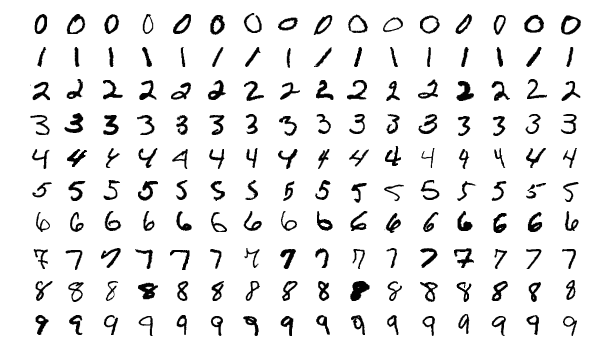

In [1]:
from PIL import Image
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-1.png')

'5'를 제대로 분류하는 프로그램을 직접 고안해 설계하기란 의외로 어려운 문제임을 알 수 있다. 사람이라면 어렵지 않게 인식하지만, 그 안에 숨은 규칙성을 명확한 로직으로 풀기는 만만치 않다. 사실 [그림4-1]을 잘 보면, 사람마다 버릇이 달라 '5'를 특징짓는 규칙을 찾기도 쉽지 않고 시간도 오래 걸릴 것 같다는 느낌이 들 것이다.      

이쯤 되면 '5'를 인식하는 알고리즘을 밑바닥부터 '설계하는' 대신, 주어진 데이터를 잘 활용해서 해결하고 싶어질 것이다. 그런 방법의 하나로, 이미지에서 $\scriptsize\textbf{특징}^{\text{feature}}$ 을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다. 여기서 말하는 특징은 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다. 이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용한다. 이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다.       


이와 같은 기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당한다. $\scriptsize\text{무}^{\text{zero}}$로부터 알고리즘을 설계하는 것보다 효율이 높아 문제를 해결해야 하는 사람의 부담도 덜어준다. 다만, 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 '사람'이 설계하는 것임에 주의해야 한다. 이 말은 문제에 적합한 특징을 쓰지 않으면 (혹은 특징을 설계하지 않으면) 좀처럼 좋은 결과를 얻을 수 없다는 뜻이다. 예를 들어 개의 얼굴을 구분하려 할 때는 숫자를 인식할 때와는 다른 특징을 '사람'이 생각해야 할지도 모른다. 즉, 특징과 기계학습을 활용한 접근에도 문제에 따라서는 '사람'이 적절한 특징을 생각해내야 하는 것이다.

지금까지 기계학습의 두 가지 접근법을 이야기해보았다. 이 두 방식 모두 그림으로 나타내면 [그림4-2]의 중간과 같다. 반면 신경망(딥러닝) 방식은 [그림4-2]의 아래처럼 사람이 개입하지 않는 블록 하나로 그려진다.

#### [그림4-2]
규칙을 '사람'이 만드는 방식에서 '기계'가 데이터로부터 배우는 방식으로의 패러다임 전환 : 색칠된 블록은 사람이 개입하지 않음을 뜻한다.

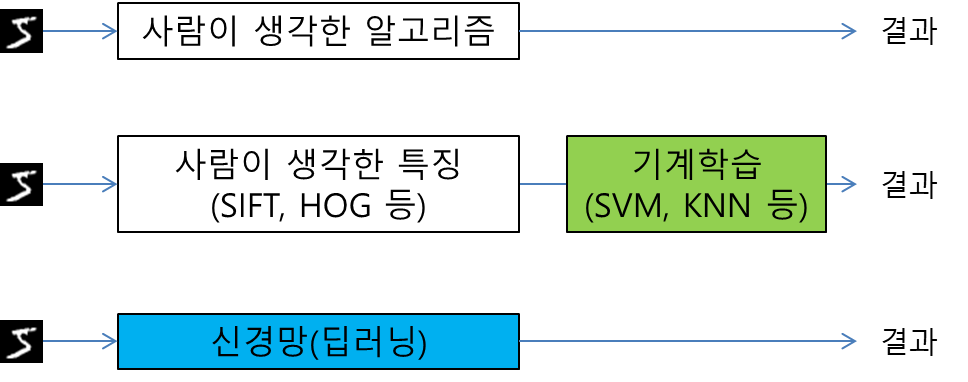

In [2]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-2.png')

[그림4-2]와 같이 신경망은 이미지를 '있는 그대로' 학습한다. 두 번째 접근 방식 (특징과 기계학습 방식)에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습할 것이다.

$\textbf{NOTE}$
> 딥러닝을 $\scriptsize \textbf{종단간 기계학습}^{\text{end-to-end machine learning}}$이라고도 한다. 여기서 종단간은 '처음부터 끝까지'라는 의미로, 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻을 담고 있다.

신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점에 있다. 예를 들어 '5'를 인식하는 문제든, '개'를 인식하는 문제든, 아니면 '사람의 얼굴'을 인식하는 문제든, 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다. 즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습 가능한 것이다.

### 4.1.2 훈련 데이터와 시험 데이터
본격적인 신경망 학습 설명에 앞서, 기계학습에서 데이터를 취급할 때 주의할 점을 이야기하겠다.     

기계학습 문제는 데이터를 $\scriptsize \textbf{훈련 데이터}^{\text{training data}}$와 $\scriptsize \textbf{시험 데이터}^{\text{test data}}$로 나눠 학습과 실험을 수행하는 것이 일반적이다. 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것이다. 그러면 왜 훈련 데이터와 시험 데이터를 나눠야 할까? 그것은 우리가 원하는 것은 범용적으로 사용할 수 있는 모델이기 때문이다. 이 $\scriptsize \textbf{범용 능력}$을 제대로 평가하기 위해 훈련 데이터와 $\scriptsize \textbf{시험 데이터}$를 분리하는 것이다.     

범용 능력은 아직 보지 못한 데이터 (훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력이다. 이 범용 능력을 획득하는 것이 기계학습의 최종목표이기도 하다. 예를 들어 손글씨 숫자 인식의 최종 결과는 엽서에서 우편 번호를 자동으로 판독하는 시스템에 쓰일지도 모른다. 그렇다면 손글씨 숫자 인식은 '누군가'가 쓴 글자를 인식하는 능력이 높지 않으면 안된다. 그 글자는 '특정인의 특정 글자'가 아니라 '임의의 사람의 임의의 글자'이다. 만약 수중에 있는 훈련 데이터만 잘 판별한다면 그 데이터에 포함된 사람의 글씨체만 학습했을 가능성이 크다.      

그래서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다. 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는 엉망인 일도 벌어진다. 참고로 한 데이터셋에만 지나치게 최적화된 상태를 $\scriptsize \textbf{오버피팅}^{\text{overfitting}}$이라고 한다. 오버피팅 피하기는 기계학습의 중요한 과제중 하나이다.

$\textbf{SELF NOTE}$
> $\scriptsize \textbf{오버피팅}^{\text{overfitting}}$ 은 과적합, 과대적합, 과학습, 과적응 등 다양하게 번역되는데, 주어진 데이터셋(훈련 데이터)을 매우 잘 반영하는 모델에 대해 훈련 데이터를 적합시켰을 때 주로 발생하는 현상이다. 예를 들어 100개의 데이터 포인트가 주어졌을때, 10개의 데이터 포인트를 모두 지나가는 99차 함수로 모델 적합을 하게 되면 훈련 데이터에 대해선 예측 정확도가 100퍼센트가 되지만, 시험 데이터로 시험을 하게 되면 그 정확도는 매우 떨어지는 경우가 많다. 이러한 과적합을 피해서 모델의 $\scriptsize \textbf{일반화}^{\text{generalization}}$성능을 끌어올리는 것이 바람직하다.        

> 반대의 경우도 있다. $\scriptsize \textbf{언더피팅}^{\text{underfitting}}$은 과소적합으로 불리는데, 주어진 데이터셋(훈련 데이터)을 잘 반영하지 못하는 모델에 대해 훈련 데이터를 적합시켰을 때 주로 발생하는 현상이다. 예를 들어 100개의 데이터 포인트가 주어지고 이 데이터포인트를 플롯했을 때 2차곡선 형태가 그려진 경우를 생각해보자. 이러한 경우 2차 곡선 형태로 모델을 훈련데이터에 대해 적합시키는게 좋을 것이다. 그런데 2차 곡선이 아닌 1차 함수 (직선) 형태로 모델을 적합시키면 훈련 데이터에 대해서 그 예측 정확도가 매우 떨어지게 될 것이다.      

> 이러한 점들을 고려해서, 모델을 훈련데이터에 과적합이 되지 않게, 그러면서 동시에 훈련데이터를 잘 반영하도록 모델을 적합시키는게 매우 중요하다.

## 4.2 손실 함수
신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하게 된다. 신경망은 이러한 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다. 신경망 학습에서 사용하는 지표는 $\scriptsize \textbf{손실 함수}^{\text{loss function}}$라고 한다. 이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

$\textbf{WARNING}$      
> 손실함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못'하느냐를 나타낸다. '성능 나쁨'을 지표로 한다니 무언가 부자연스럽다고 생각할지 모르지만, 손실 함수에 마이너스만 곱하면 '얼마나 나쁘지 않나', 즉 '얼마나 좋으냐'라는 지표로 변신한다. 또, '나쁨을 최소로 하는 것'과 '좋음을 최대로 하는 것'은 결국 같은 것이니까, 성능의 '나쁨'과 '좋음'중 어느 쪽을 지표로 삼아도 본질적으로 수행하는 일은 다르지 않다.

### 4.2.1 오차제곱합
가장 많이 쓰이는 손실 함수는 $\scriptsize \textbf{오차제곱합}^{\text{sum of squares for error, SSE}}$이다. 수식으로는 다음과 같다.

\begin{equation*}
    E = \frac{1}{2} \displaystyle\sum_{k}^{} (y_k - \hat{y}_k)^{2}
\end{equation*} \tag{4.1}

여기서 $\hat{y}_k$는 신경망의 출력(신경망이 추정한 값), $y_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다. 이를테면 "3.6 손글씨 숫자 인식"예에서 $y_k$와 $\hat{y}_k$는 다음과 같은 원소 10개짜리 데이터이다.

In [3]:
import numpy as np
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

오차제곱합은 식 (4.1)과 같이 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차 $(y_k - \hat{y}_k)$를 제곱한 후, 그 총합을 구한다. 그러면 이 오차제곱합을 파이썬으로 구현해보자.

In [4]:
def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

여기에서 인수 `y`와 `t`는 넘파이 배열이다. 이제 `sum_squared_error`를 실제로 사용해보자.

In [5]:
# 정답은 '2'
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# 예1: '2'일 확률이 가장 높다고 추정함(0.6)
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
print(sum_squared_error(y, t)) # 정답에 가까울수록 작은 값이 나온다

# 예2: '7'일 확률이 가장 높다고 추정함(0.6)
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(sum_squared_error(y, t)) # 정답에서 멀수록 큰 값이 나온다


0.09750000000000003
0.5975


두 가지 예를 살펴보았다. 첫 번째의 예는 정답이 '2'이고 신경망의 출력도 '2'에서 가장 높은 경우이다. 한편, 두 번째 예에서는 정답은 똑같이 '2'지만, 신경망의 출력은 '7'에서 가장 높다. 이 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다. 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있다.

$\textbf{SELF NOTE}$        
> 식 (4.1)은 $\scriptsize \textbf{제곱오차 손실 함수}^{\text{squared error loss}}$ 라고도 부른다.       

> 이러한 제곱오차 손실 함수의 등장 배경은 통계학의 $\scriptsize \textbf{최대가능도추정}^{\text{maximum likelihood estimation}}$과 깊은 연관이 있다. 이에 대해서는 추후에 다시 다루기로 한다.

### 4.2.2 교차 엔트로피 오차
또 다른 손실 함수로서 $\scriptsize \textbf{교차 엔트로피 오차}^{\text{cross entropy error, CEE}}$도 자주 이용한다. 교차 엔트로피 오차의 수식은 다음과 같다.

\begin{equation*}
    E = - \displaystyle\sum_{k}^{} (y_k - \hat{y}_k)^{2}
\end{equation*} \tag{4.2}

여기에서 $\log$는 밑이 $e$인 자연로그$(\log_{e})$ 이다. $\hat{y}_k$는 신경망의 출력, $y_k$는 정답 레이블이다. 또한 $y_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다(원-핫 인코딩). 그래서 식 (4.2)는 실질적으로 정답일 때의 추정 ($y_k$ 가 1일 때의 $\hat{y}_k$ )의 자연로그를 계산하는 식이 된다. 예를 들어 정답 레이블은 '2'가 정답이라 하고 이때의 신경망 출력이 0.6 이라면 교차 엔트로피 오차는 $-\log 0.6 = 0.51$이 된다. 또한, 같은 조건에서 신경망 출력이 0.1이라면 $-\log 0.1 = 2.30$이 된다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.        

한 편, [그림4-2]은 자연로그의 그래프이다.

#### [그림4-3] 자연로그 $y=\log x$의 그래프

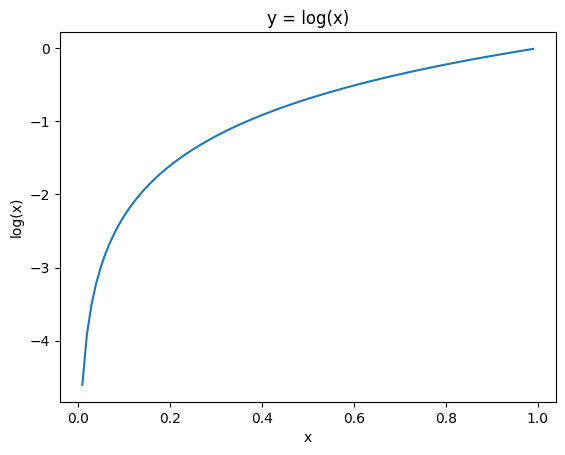

In [6]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-3.png')

이 그림에서 보듯이 $x$가 1일 때 $y$는 0이 되고 $x$가 0에 가까워질수록 $y$의 값은 점점 작아진다. 식 (4.2)도 마찬가지로 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다. 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.        

그럼 교차 엔트로피 오차를 구현해보자.

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

여기서 `y`와 `t`는 넘파이 배열이다. 그런데 코드 마지막을 보면 `np.log`를 계산할 때 아주 작은 값인 `delta`를 더했다. 이는 `np.log()`함수에 0을 입력하면 마이너스 무한대를 뜻하는 `-inf`가 되어 더 이상 계산을 진행할 수 없게 되기 때문이다. 아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 한 것이다. 그러면 이러한 `cross_entropy_error(y,t)` 함수를 써서 간단한 계산을 해보자. 정답은 똑같이 '2'이다.

In [8]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
print(cross_entropy_error(y, t)) # 정답에 가까울수록 작은 값이 나온다

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(cross_entropy_error(y, t)) # 정답에서 멀수록 큰 값이 나온다

0.510825457099338
2.302584092994546


첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51이다. 그 다음은 정답일 때의 출력이 (더 낮은) 0.1인 경우로, 이때의 교차 엔트로피 오차는 무려 2.3이다. 즉, 결과 (오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치한다.

### 4.2.3 미니배치 학습
기계학습 무넺는 훈련 데이터를 사용하여 학습한다. 더 구체적으로 말하면 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다. 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 계산해야 한다. 즉, 훈련 데이터가 100개 있으며 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것이다.     

지금까지 데이터 하나에 대한 손실 함수만 생각해왔으니, 이제 훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법을 생각해보자. 예를 들어 교차 엔트로피 오차는 식 (4.3)처럼 된다.      

\begin{equation*}
    E = - \frac{1}{N} \displaystyle\sum_{i=1}^{N} \displaystyle\sum_{k=1}^{K} y_{ik} \log \hat{y}_{ik}
\end{equation*} \tag{4.3}

이때 데이터가 $N$개라면 $y_{ik}$는 $i$번째 데이터의 $k$번째 값을 의미한다. ($\hat{y}_{ik}$는 신경망의 출력, $y_{ik}$ 는 정답 레이블이다) 수식이 좀 복잡해 보이지만 데이터 하나에 대한 손실 함수인 식 (4.2)를 단순히 $N$개의 데이터로 확장했을 뿐이다. 다만, 마지막에 $N$으로 나누어 정규화하고 있다. $N$으로 나눔으로써 '평균 손실 함수'를 구하는 것이다. 이렇게 평균을 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다. 예를 들어 훈련 데이터가 1,000개든 10,000개든 상관없이 평균 손실 함수를 구할 수 있다.

그런데 MNIST 데이터셋은 훈련 데이터가 60,000개였다. 그래서 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 좀 걸리게 된다. 더 나아가 빅데이터 수준이 되면 그 수는 수백만에서 수천만도 넘는 거대한 값이 되기도 한다. 이 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 현실적이지 않을 것이다. 이런 경우 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있다. 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행한다. 이 일부를 $\scriptsize \textbf{미니배치}^{\text{mini-batch}}$라고 한다. 가령 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100만을 사용하여 학습하는 것이다. 이러한 학습 방법을 $\scriptsize \textbf{미니배치 학습}$이라고 한다.        

그렇다면 미니배치 학습을 구현하는, 즉 훈련 데이터에서 지정한 수의 데이터를 무작위로 골라내는 코드를 작성해보자. MNIST 데이터셋을 읽어오는 코드는 다음과 같다.

In [9]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


그러면 이 훈련 데이터에서 무작위로 10장만 빼내려면 어떻게 하면 될까? 넘파이의 `np.random.choice()`함수를 쓰면 다음과 같이 간단히 해결할 수 있다.

In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 무작위로 10개의 인덱스 생성
print(batch_mask, type(batch_mask)) 
x_batch = x_train[batch_mask] # 좀전에 생성한 10개의 인덱스로 10개의 데이터를 뽑아낸다
t_batch = t_train[batch_mask] # 좀전에 생성한 10개의 인덱스로 10개의 데이터를 뽑아낸다
        

[28553 10199 26011 57500 50973  1517 55341  4792  9207 11388] <class 'numpy.ndarray'>


`np.random.choice()`로는 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있다. 가령 `np.random.choice(60000,10)`은 0이상 60000 미만의 수 중에서 무작위로 10개를 골라낸다. 다음은 실제로 돌려본 모습이다. 이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용하면 될 것이다.

In [11]:
np.random.choice(60000,10)

array([24919, 14083, 13015, 34461,  8399, 48888, 19253, 19597,  8425,
       50486])

이제 무작위로 선택한 이 인덱스를 사용해 미니배치를 뽑아내기만 하면 된다. 손실 함수도 이 미니배치로 계산한다.

$\textbf{NOTE}$     
> 텔레비전 시청률도 모든 세대의 텔레비전이 아니라 선택된 일부 가구의 텔레비전만을 대상으로 구한다. 예를 들어 경기 지방에서 무작위로 선정한 1,000가구를 대상으로 시청률을 계측한 다음, 경기 지방 전체의 시청률로 근사하는 것이다. 그 1,000가구의 시청률이 전체 시청률과 정확히 일치하지는 않겠지만, 전체의 대략적인 값으로 사용할 수 있다. 이 시청률 이야기와 마찬가지로 미니배치의 손실 함수도 일부 표본 데이터로 전체를 비슷하게 계측한다. 즉, 전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리를 (미니배치)사용하는 것이다.

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
그럼, 미니배치 같은 배치 데이터를 지언하는 교차 엔트로피 오차는 어떻게 구현할까? 다행히 조금 전에 구현한 교차 엔트로피 오차(데이터를 하나씪 처리하는 구현)를 조금만 바꿔주면 된다. 여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현한다.

In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [13]:
t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
                [0.6, 0.1, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.6],
                [0.1, 0.05, 0.1, 0.0, 0.6, 0.1, 0.0, 0.1, 0.0, 0.0]])
print(cross_entropy_error(y, t)) # 정답에 가까울수록 작은 값이 나온다

0.510825457099338


이 코드에서 `y`는 신경망의 출력, `t`는 정답 레이블이다. `y`가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 `reshape`함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.        

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있다.

In [14]:
import numpy as np

In [15]:
# 이건 t가 2차원 배열이 아니라 1차원 배열이라서 
# t * np.log(y) 형태로 계산하는게 아니다.
# 정답 레이블에 대응되는 y값을 y[np.arange(batch_size), t]으로
# 가져오기 때문에 그냥 np.log(y)로 계산해도 된다.
def cross_entropy_error(y, t): 
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

이 구현에서는 원-핫 인코딩일 때 `t`가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다. 다시 말하면 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다. 그래서 원-핫 인코딩 시 `t * np.log(y)`였던 부분을 레이블 표현일 때는
```python
np.log(y[np.arange(batch_size), t] + 1e-7)
```
으로 구현한다.(설명을 간결히 하기 위해 미세한 값 `1e-7`은 언급하지 않는다)      

참고로 `np.log(y[np.arange(batch_size), t] + 1e-7)`를 간단히 설명하고자 한다. `np.arange()`는 0부터 `batch_size - 1`까지 배열을 생성한다. 즉, `batch_size`가 5라면 `np.arange(batch_size)`는 `[0, 1, 2, 3, 4]`라는 넘파이 배열을 생성한다. `t`에는 레이블이 `[2, 7, 0, 9, 4]`와 같이 저장되어 있으므로 `y[np.arange(batch_size), t]`는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다. (이 예에서는 `y[np.arange(batch_size), t]` 는 `y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]`인 넘파이 배열을 생성한다.)       

이해를 돕기 위해 다음 코드를 보도록 한다.

In [16]:
t = np.array([2, 7, 0, 9, 4])
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
                [0.6, 0.1, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
                [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.6],
                [0.1, 0.05, 0.1, 0.0, 0.6, 0.1, 0.0, 0.1, 0.0, 0.0]])
cross_entropy_error(y, t)

0.510825457099338

In [17]:
batch_size = 5

print(y[np.arange(batch_size), t])
print(y[np.arange(batch_size), t] + 1e-7)
print(np.log(y[np.arange(batch_size), t] + 1e-7))
print(-np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size)

[0.6 0.6 0.6 0.6 0.6]
[0.6000001 0.6000001 0.6000001 0.6000001 0.6000001]
[-0.51082546 -0.51082546 -0.51082546 -0.51082546 -0.51082546]
0.510825457099338


### 4.2.5 왜 손실 함수를 설정하는가?
이쯤이면 손실 함수의 정의는 이해되었을 것이다. 그런데 왜 굳이 손실 함수를 사용해야 하는 것일까? 예컨대 숫자 인식의 경우도 우리의 궁극적인 목적은 높은 '정확도'를 끌어내는 매개변수 값을 찾는 것이다. 그렇다면 '정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유는 무엇일까?     

이 의문은 신경망 학습에서 '미분'의 역할에 주목한다면 해결된다. 자세한 것은 다음 절에서 설명하겠지만, 신경망 학습에서는 최적의 매개변수 (가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다. 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.        

가령 여기에 가상의 신경망이 있고 그 신경망의 어느 한 가중치 매개변수에 주목한다고 해보자. 이때 그 가중치 매개변수의 손실 함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나'라는 의미이다. 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 반대로, 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 그러나 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않는다. 그래서 가중치 매개변수의 갱신은 거기서 멈추게 된다.     

> 정확도를 지표로 삼아서는 안 되는 이유는 미분 값이(매개변수의 미분 값) 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다.

정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이 되는 이유는 무엇일까? 구체적인 예를 보자. 한 신경망이 100장의 훈련 데이터 중 32장을 올바로 인식한다고 하자. 그렇다면 정확도는 32%이다. 만약 정확도가 지표였다면 가중치 매개변수의 값을 조금 바꾼다고 해도 정확도는 그대로 32%일 것이다. 즉, 매개변수를 약간만 조정해서는 정확도 개선되지 않고 일정하게 유지된다. 혹, 정확도가 개선된다 하더라도 그 값은 32.0123%와 같은 연속적인 변화보다는 33%나 34%처럼 불연속적인 띄엄띄엄한 값으로 바뀌어버린다.     

한편, 손실 함수를 지표로 삼았다면 어떨까? 현재의 손실 함수의 값은 0.92543... 같은 수치로 나타난다. 그리고 매개변수의 값이 조금 변하면 그에 반응하여 손실 함수의 값도 0.93432... 처럼 연속적으로 변화하는 것이다.        

정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다. 이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와도 들어맞는다. 만약 활성화 함수로 계단 함수를 사용하면 지금까지 설명한 것과 같은 이유로 신경망 학습이 잘 이뤄지지 않게 된다. 계단 함수의 미분은 [그림4-4]와 같이 대부분의 장소(0 이외의 곳)에서 0이다. 그 결과, 계단 함수를 이용하면 손실 함수를 지표로 삼는게 아무 의미가 없게 된다. 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문이다. (기울기 소실)

#### [그림4-4] 계단 함수와 시그모이드 함수
계단 함수는 대부분의 장소에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)는 0이 아니다.

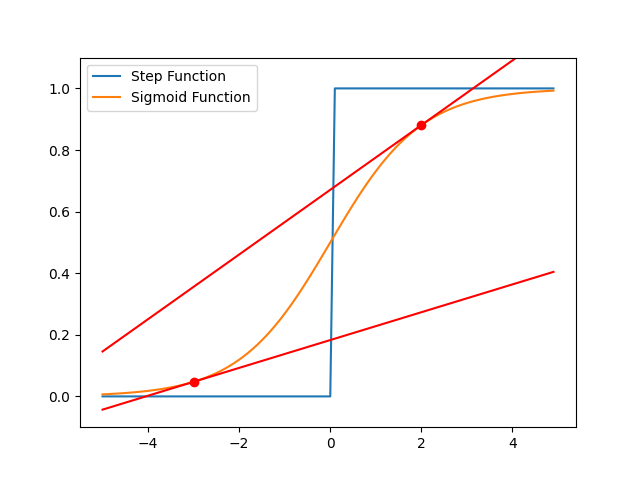

In [18]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-4.png')

계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수의 미분(접선)은 [그림4-4]와 같이 출력(세로축의 값)이 연속적으로 변하고 곡선의 기울기도 연속적으로 변한다. 즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지는 않는다. 이는 신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있는 것이다.

$\textbf{SELF NOTE}$        
> 미분이 0이 되지 않는다고 해서 시그모이드 함수가 신경망 학습에 가장 좋은 함수는 아니다. 미분이 0에 가까워지게 되면 매개변수의 값의 변화량도 매우 작아지게 되고 그 결과 정확도가 개선되는 속도도 매우 느려지게 된다. 시그모이드 함수의 경우 입력값이 양의 무한대나 음의 무한대에 가까워질수록 그 값에 해당되는 미분값이 0에 점점 가까워져 신경망의 학습이 매우 느려질 수 있다. 이러한 문제를 $\scriptsize \textbf{기울기 소실}^{\text{gradient vansishing}}$이라고 한다.        

> 이와 같은 기울기 소실문제를 해결해주는 함수는 여럿 있는데, 그중 가장 유명한 함수는 $\scriptsize \textbf{ReLU}^{\text{Rectified Linear Unit}}$이다.

## 4.3 수치 미분
경사법에서는 기울기 (경사) 값을 기준으로 나아갈 방향을 정한다. 기울기란 무엇인지, 또 어떤 성질이 있는지를 설명하기에 앞서, 이번 절에서는 학생 때 배운 '미분'부터 복습해보록 한다.

### 4.3.1 미분
미분은 '특정 순간'(한순간)의 변화량을 뜻한다. 수식으로는 다음과 같다.
\begin{equation*}
    \cfrac{df(x)}{dx} = \underset{h \rightarrow 0}{\lim} \cfrac{f(x+h) - f(x)}{h}
\end{equation*} \tag{4.4}

식 (4.4)는 함수의 미분을 나타낸 식이다. 좌변은 $f(x)$의 $x$에 대한 미분($x$에 대한 $f(x)$의 변화량)을 나타내는 기호이다. 결국, $x$의 '작은 변화'가 함수 $f(x)$를 얼마나 변화시키느냐를 의미한다. 이때 시간의 작은 변화, 즉 시간을 뜻하는 $h$를 한없이 0에 가깝게 한다는 의미를 $\underset{h \rightarrow 0}{\lim}$으로 나타낸다.     

이제 식 (4.4)를 참고해서 함수를 미분하는 계산을 파이썬으로 구현해보자. 식 (4.4)를 수식 그대로 구현하려면 $h$에 작은 값을 대입해 다음과 같이 계산할 수 있다.

In [19]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

함수의 이름은 $\scriptsize \textbf{수치 미분}^{\text{numerical differentiation}}$에서 따온 `numerical_diff(f,x)`으로 하였다. 이 함수는 '함수 `f`'와 '함수 `f`에 넘길 인수 `x`'라는 두 인수를 받는다. 얼핏 보면 문제가 없어 보이지만, 실제로는 2가지의 개선해야 할 점이 존재한다.        

앞의 구현에서는 `h`에 가급적 작은 값을 대입하고 싶었기에(가능하다면 `h`를 0으로 무한히 가깝게 하고 싶으니) `1e-50`이라는 작은 값을 이용한다. 이 값은 0.00...1 형태에서 소수점 아래 0이 50개라는 의미이다. 그러나 이 방식은 $\scriptsize \textbf{반올림 오차}^{\text{rounding error}}$문제를 일으킨다. 반올림 오차는 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기게 된다. 파이썬에서의 반올림 오차로는 다음과 같은 예가 있다.

In [20]:
np.float32(1e-50)   # 0.0

0.0

이와 같이 `1e-50`을 `float32`형 (32비트 부동소수점)으로 나타내면 0.0이 되어, 올바르게 표현이 불가능하다. 너무 작은 값을 이용하면 컴퓨터로 계산하는데 문제가 된다는 것이다. 여기가 첫 번째 개선 포인트이다. 이 미세한 값 `h`로 $10^{-4}$를 이용해보자. $10^{-4}$정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있다.       

두 번째 개선은 함수 `f`의 차분과 관련한 것이다. 앞의 구현에서는 `x+h`와 `x`사이의 함수값 `f`의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실에 주의해야 한다. [그림4-5]와 같이 `진정한 미분`은 $x$위치의 함수의 기울기 (이를 접선이라 함) 에 해당하지만, 이번 구현에서의 미분은 $(x+h)$와 $x$사이의 기울기에 해당한다. 그래서 진정한 미분(진정한 접선)과 이번 구현의 값은 엄밀하게 일치하지는 않는다. 이 차이는 $h$를 무한히 0으로 좁히는 것이 불가능하여 생기는 한계이다.

#### [그림4-5] 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.

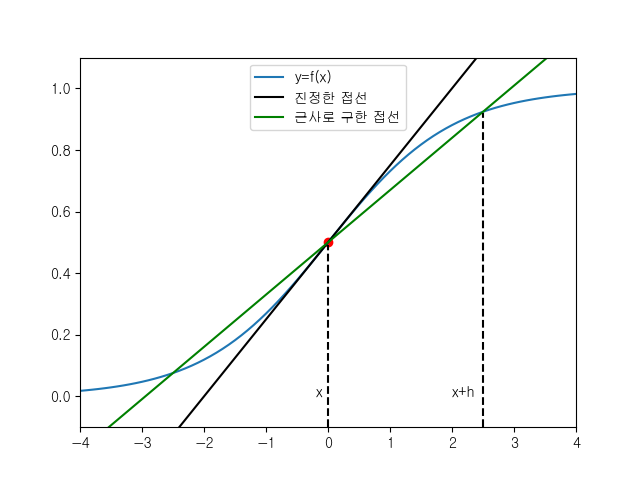

In [21]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-5.png')

[그림4-5] 와 같이 수치 미분에는 오차가 포함된다. 이 오차를 줄이기 위해 $(x+h)$와 $(x-h)$일 때의 함수 $f$의 차분을 계산하는 방법을 쓰기도 한다. 이 차분은 $x$를 중심으로 그 전후의 차분을 계산한다는 의미에서 $\scriptsize \textbf{중심 차분}$ 혹은 $\scriptsize \textbf{중앙 차분}$이라 한다. (한편, $(x+h)$ 와 $x$의 차분은 $\scriptsize \textbf{전방 차분}$이라 한다)     

그럼 이상의 두 개선점을 적용해 수치 미분을 다시 구현해보자.

In [22]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

$\textbf{NOTE}$     
> 여기에서 하는 것처럼 아주 작은 차분으로 미분하는 것을 $\scriptsize \textbf{수치 미분}$이라 한다. 한편, 수식을 전개해 미분하는 것은 $\scriptsize \textbf{해석적}^{\text{analytic}}$이라는 말을 이용하여 '해석적 해' 혹은 '해석적으로 미분하다'등으로 표현한다. 가령 $y=x^{2}$의 미분은 해석적으로는 $\tfrac{dy}{dx} = 2x$으로 풀어낼 수 있다. 그래서 $x=2$일 때 $y$의 미분은 4가 된다. 해석적 미분은 오차를 포함하지 않는 '진정한 미분'값을 구해준다.

### 4.3.2 수치 미분의 예
앞 절의 수치 미분을 사용하여 간단한 함수를 미분해보자. 우선 다음과 같은 2차 함수이다.
\begin{equation*}
    y = 0.01x^{2} + 0.1x
\end{equation*} \tag{4.5}

식 (4.5)를 파이썬으로 구현하면 다음과 같다.

In [23]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

이어서 이 함수를 그려보자.

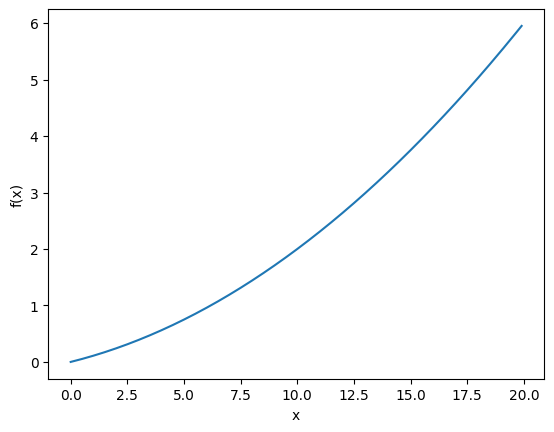

In [24]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

그럼 `x=5`일 때와 10일 때 이 함수의 미분을 계산해보자.

In [25]:
print(numerical_diff(function_1, 5)) # 0.1999999999990898
print(numerical_diff(function_1, 10)) # 0.2999999999986347

0.1999999999990898
0.2999999999986347


이렇게 계산한 미분 값이 $x$에 대한 $\scriptsize f(x)$의 변화량이다. 즉, 함수의 기울기에 해당한다. 또한 $\scriptsize f(x) = 0.01x^{2}+0.1x$의 해석적 해는 $\scriptsize \tfrac{df(x)}{dx}= 0.02x + 0.1$이다. 그래서 `x`가 5와 10일 때의 '진정한 미분'은 차례로 0.2와 0.3이다. 앞의 수치 미분과 결과를 비교하면 그 오차가 매우 작음을 알 수 있다. 실제로 거의 같은 값이라고 해도 될 만큼 작은 오차이다.        


#### [그림4-6] $x=5$에서의 접선 : 직선의 기울기는 수치 미분에서 구한 값을 사용

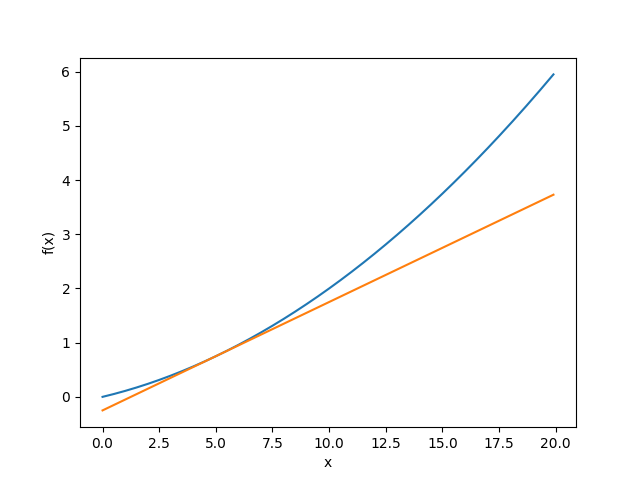

In [26]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-6.png')

### 4.3.3 편미분
이어서 식 (4.6)의 함수를 살펴보자. 인수들의 제곱 합을 계산하는 단순한 식이지만, 앞의 예와 달리 변수가 2개라는 점에 주의해야 한다.
\begin{equation*}
    f(x_0, x_1) = x^{2}_0 + x^{2}_1
\end{equation*} \tag{4.6}

이 식은 파이썬으로 다음과 같이 구현 가능하다.

In [27]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

인수 `x`는 넘파이 배열이라고 가정하자. 이 코드는 넘파이 배열의 각 원소를 제곱하고 그 합을 구할 뿐인 간단한 구현이다. 이 함수를 그래프로 그려보자. 결과는 [그림4-7]처럼 3차원으로 그려진다.

#### [그림4-7] $\scriptsize f(x_0, x_1) = x^{2}_0 + x^{2}_1$의 그래프

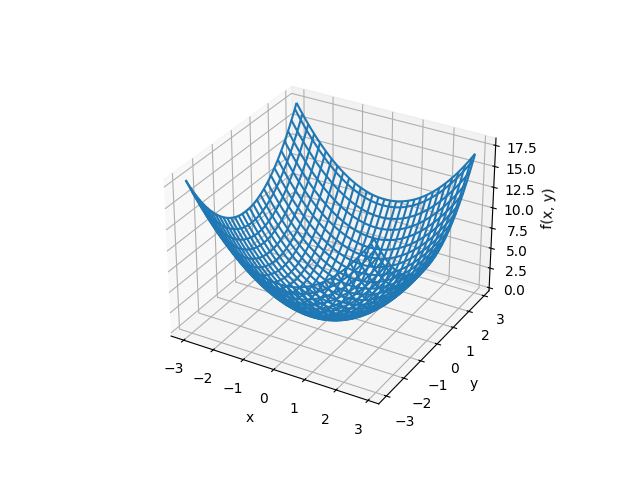

In [28]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-7.png')

그럼 식 (4.6)을 미분해보자. 여기서 주의할 점은 식 (4.6)에는 변수가 2개라는 것이다. 그래서 '어느 변수에 대한 미분이냐', 즉 $x_0$와 $x_1$중 어느 변수에 대한 미분이냐를 구별해야 한다. 덧붙여 이와 같이 변수가 여럿인 함수에 대한 미분을 $\scriptsize \textbf{편미분}$이라 한다. 이 편미분을 수식으로는 $\scriptsize \tfrac{\partial f}{\partial x_0}$ 나 $\scriptsize \tfrac{\partial f}{\partial x_1}$ 처럼 쓴다.       

편미분은 어떻게 구할까? 연습 삼아 다음 두 편미분 문제를 풀어보자.       

#### 문제 1: $ x_0 = 3, x_1 = 4$일 때, $ x_0$에 대한 편미분 $\scriptsize \frac{\partial f}{\partial x_0}$를 구해라.

In [29]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0)) # 6.00000000000378

6.00000000000378


#### 문제 2: $ x_0 = 3, x_1 = 4$일 때, $ x_1$에 대한 편미분 $\scriptsize \frac{\partial f}{\partial x_1}$를 구해라.

In [30]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0)) # 7.999999999999119

7.999999999999119


위 문제들은 변수가 하나인 함수를 정의하고, 그 함수를 미분하는 형태로 구현하여 푸는 형태이다. 예를 들어 문제 1에서는 $\scriptsize x_1 =4$로 고정된 새로운 함수를 정의하고, 변수가 $x_0$하나뿐인 함수에 대해 수치 미분 함수를 적용한다. 이렇게 구한 문제 1의 결과는 6.00000000000378, 문제 2의 결과는 7.999999999999119이다. 보다시피 해석적 미분의 결과와 거의 같다.     

이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다. 앞의 예에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해 새로운 함수를 정의했다. 그리고 그 새로 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구한 것이다.

## 4.4 기울기
앞 절의 예에서는 $\small x_0$와 $\small x_1$의 편미분을 변수별로 따로 계산하였다. 그럼 $\small x_0$와 $\small x_1$의 편미분을 동시에 계산하고 싶다면 어떻게 할까? 가령 $\small x_0=3$, $\small x_1= 4$일 때 $\small (x_0,x_1)$ 양쪽의 편미분을 묶어서 $\small (\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$을 계산한다고 생각해보자. 이때 $\small (\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$ 처럼 모든 변수의 편미분을 벡터로 정리한 것을 $\small \textbf{기울기}^{\text{gradient}}$라고 한다. 기울기는 예를 들어 다음과 같이 구현할 수 있다.

In [31]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

`numerical_gradient(f,x)`함수의 구현은 좀 복잡해 보이지만, 동작 방식은 변수가 하나일 때의 수치 미분과 사실상 같다. 참고로, `np.zeros_like(x)`는 `x`와 형상이 같고 그 원소가 모두 0인 배열을 만든다.     

`numerical_gradient(f,x)`의 인수인 `f`는 함수이고 `x`는 넘파이 배열이므로 넘파이 배열 `x`의 각 원소에 대해서 수치 미분을 구한다. 그러면 이 함수를 사용해서 실제로 기울기를 계산해보자. 여기에서는 세 점 $(3,4), (0,2), (3,0)$에서의 기울기를 구해보도록 한다.

In [32]:
print(numerical_gradient(function_2, np.array([3.0, 4.0]))) # [6. 8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0]))) # [0. 4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0]))) # [6. 0.]

[6. 8.]
[0. 4.]
[6. 0.]


이처럼 $\small (x_0,x_1)$의 각 점에서의 기울기를 계산할 수 있다. 앞의 예에서는 점 $(3,4)$의 기울기는 $(6,8)$, 점 $(0,2)$의 기울기 는 $(0,4)$, 점 $(3,0)$의 기울기는 $(6,0)$이라는 결과를 얻었다. 그런데 이 기울기라는게 의미하는건 무엇일까? 다만 여기에서는 기울기의 결과에 마이너스를 붙인 벡터를 그려보도록 한다. (소스 코드는 ch04/gradient_2d.py에 있다)

기울기 그림은 [그림4-8]처럼 방향을 가진 벡터(화살표)로 그려진다. 이 그림을 보면 기울기는 함수의 '가장 낮은 장소(최솟값)'를 가리키는 것 같기도 하다. 마치 나침반처럼 화살표들은 한 점을 향하고 있다. 또 '가장 낮은 곳'에서 멀어질수록 화살표의 크기가 커짐을 알 수 있다.

#### [그림4-8] $\small f(x_0,x_1) = x^{2}_0 + x^{2}_1$

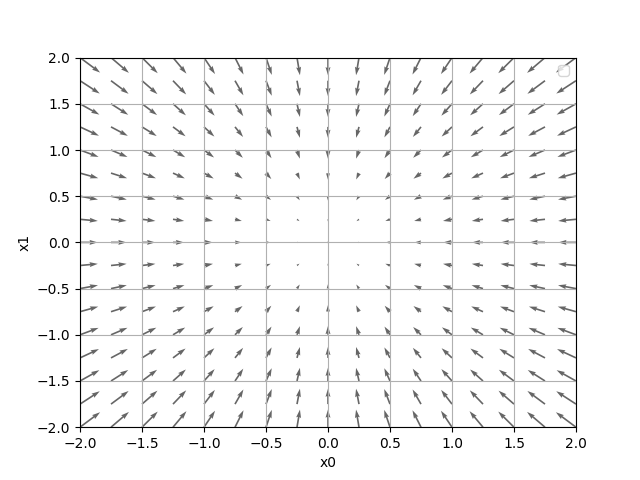

In [33]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-8.png')

[그림4-8]에서 기울기는 가장 낮은 장소를 가리키지만, 실제로 반드시 그렇다고 할 수는 없다. 사실 기울기는 각 지점에서 낮아지는 방향을 가리킨다. 더 정확히 말하자면 $\small \textbf{기울기가 가리키는 방향은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다!}$ 이건 중요한 포인트이니 확실히 기억하도록 하자.

### 4.4.1 경사법(경사 하강법)
기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다. 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 한다. 여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다. 그러나 일반적인 문제의 손실 함수는 매우 복잡하다. 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없다. 이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것이 경사법이다.

여기에서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다. 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다. 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.

$\textbf{WARNING}$      
> 함수가 극솟값, 최솟값, 또 $\small \textbf{안장점}^{\text{saddle point}}$이 되는 장소에서는 기울기가 0이다. 극솟값은 국소적인 최솟값, 즉 한정된 범위에서의 최솟값인 점이다. 안장점은 어느 방향에서 보면 극댓값이고 다른 방향에서 보면 극솟값이 되는 점이다. 경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최솟값이라고는 할 수 없다.(극솟값이나 안장점일 가능성이 있다) 또, 복잡하고 찌그러진 모양의 함수라면 (대부분) 평평한 곳으로 파고들면서 $\small \textbf{고원}^{\text{plateau}}$이라 하는, 학습이 진행되지 않는 정체기에 빠질 수 있다.

기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다. 그래서 최솟값이 되는 장소를 찾는 문제(아니면 가능한 한 작은 값이 되는 장소를 찾는 문제)에서는 기울기 정보를 단서로 나아갈 방향을 정해야 한다.      

드디어 경사법이 등장할 차례이다. 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 $\small \textbf{경사법}^{\text{gradient method}}$이다. 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다. 특히 신경망 학습에는 경사법을 많이 사용한다.

$\textbf{NOTE}$     
> 경사법은 최솟값을 찾느냐, 최댓값을 찾느냐에 따라 이름이 다르다. 전자를 $\small \textbf{경사 하강법}^{\text{gradient descent}}$, 후자를 $\small \textbf{경사 상승법}^{\text{gradient ascent}}$라고 한다. 다만 손실 함수의 부호를 반전시키면 최솟값을 찾는 문제와 최댓값을 찾는 문제는 같은 것이니 하강이냐 상승이냐는 본질적으로는 중요하지 않다. 일반적으로 신경망(딥러닝) 분야에서의 경사법은 '경사 하강법'으로 등장할 때가 많다.

그럼, 경사법을 수식으로 나타내보자.
\begin{equation*}
    x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
\end{equation*}

\begin{equation*}
    x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
\end{equation*} \tag{4.7}

식 (4.7)의 $\small \eta$는 갱신하는 양을 나타낸다. 이를 신경망 학습에서 $\small \textbf{학습률}^{\text{learning rate}}$이라고 한다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률이다.       

식 (4.7)은 1회에 해당하는 갱신이고, 이 단계를 반복한다. 즉, 식 (4.7)처럼 변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것이다. 또, 여기에서는 변수가 2개인 경우를 보였으나 변수의 수가 늘어도 같은 식 (각 변수의 편미분 값)으로 갱신하게 된다.       

또한 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 하는데, 일반적으로 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없다. 신경망 학습에서는 보통 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행하게 된다.        

경사 하강법은 다음과 같이 간단하게 구현할 수 있다.

In [34]:
def gradient_descent(f, init_x, lr=0.01, step_num=1000):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

인수 `f`는 최적화하려는 함수, `init_x`는 초깃값, `lr`은 learning rate를 의미하는 학습률, `step_num`은 경사법에 따른 반복 횟수를 뜻한다. 함수의 기울기는 `numerical_gradient(f,x)`으로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 `step_num`만큼 반복한다.     

이 함수를 사용하면 함수의 극솟값을 구할 수 있고 잘하면 최솟값을 구할 수도 있다. 그럼, 연습 삼아 다음 문제를 풀어보자.

#### 문제: 경사법으로 $\small f(x_0,x_1) = x^{2}_0 + x^{2}_0$의 최솟값을 구하라.

In [35]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

여기에서는 초깃값을 (-3.0,4.0)으로 설정한 후 경사법을 사용해 최솟값 탐색을 시작한다. 최종 결과는 (-6.1e-10, 8.1e-10)으로, 거의 (0,0)에 가까운 결과이다. 실제로 진정한 최솟값은 (0,0)이므로 경사법으로 거의 정확한 결과를 얻었다고 볼 수 있다.       

경사법을 사용한 이 갱신 과정을 그림으로 나타내면 [그림4-9]처럼 된다. 값이 가장 낮은 장소인 원점에 점차 가까워지고 있다. 이 그림을 그려주는 소스 코드는 ch04/gradient_method.py에 있다.(단, 이 코드에서는 등고선을 나타내는 점선은 표시하지 않았다)

#### [그림4-9] 경사법에 의한 $\small f(x_0, x_1) = x^{2}_0 + x^{2}_1$의 갱신 과정

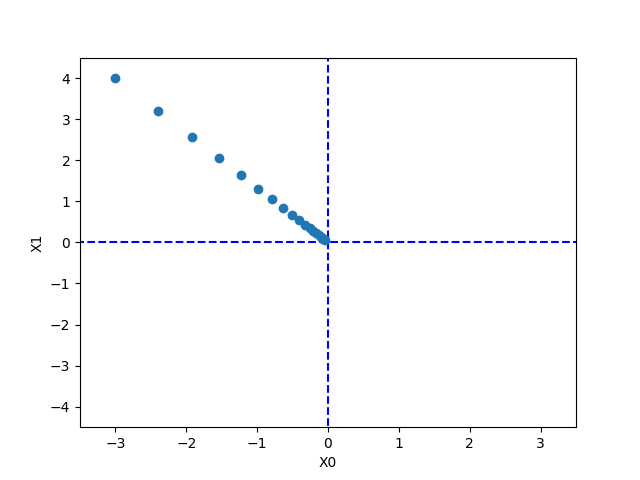

In [36]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter-4\\images\\fig 4-9.png')

여기서 잠시, 학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없다고 한 것을 잊지 말자. 이 두 경우에 대해서 실험해보도록 하자.

In [37]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


이 실험 결과와 같이 학습률이 너무 크면 큰 값으로 발산해버린다. 반대로 너무 작으면 거의 갱신되지 않은 채 끝나게 된다. 이것으로 학습률을 적절히 설정하는 일이 왜 중요한지 알게 되었을 것이다.

$\textbf{NOTE}$     
> 학습률 같은 매개변수를 $\small \textbf{하이퍼파라미터}^{\text{hyper parameter, 초매개변수}}$라고 한다. 이는 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수이다. 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 '자동'으로 획득되는 매개변수인 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수인 것이다. 일반적으로는 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

### 4.4.2 신경망에서의 기울기
신경망 학습에서도 기울기를 구해야 한다. 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다. 예를 들어 형상이 $2 \times 3$, 가중치가 $\small \mathbf{W}$, 손실함수가 $\small L$인 신경망을 생각해보자. 이 경우 경사는 $\small \frac{\partial L}{\partial \mathbf{W}}$으로 나타낼 수 있다. 수식으로는 다음과 같다.

\begin{equation*}
    \mathbf{W}
    =
    \begin{bmatrix}
        w_{11} & w_{12} & w_{13} \\
        w_{21} & w_{22} & w_{23}
    \end{bmatrix}
\end{equation*}

\begin{equation*}
    \frac{\partial L}{\partial \mathbf{W}}
    =
    \begin{bmatrix}
        \frac{\partial L}{\partial {w_{11}}} & \frac{\partial L}{\partial {w_{12}}} & \frac{\partial L}{\partial {w_{13}}} \\
        \frac{\partial L}{\partial {w_{21}}} & \frac{\partial L}{\partial {w_{22}}} & \frac{\partial L}{\partial {w_{23}}}
    \end{bmatrix}
\end{equation*} \tag{4.8}


$\small \frac{\partial L}{\partial \mathbf{W}}$ 의 각 원소는 각각의 원소에 대한 편미분이다. 예를 들어 1행 1번째 원소인 $\small \frac{\partial L}{\partial w_{11}}$ 은 $\small w_{11}$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하느냐를 나타낸다. 여기서 중요한 점은 $\small \frac{\partial L}{\partial \mathbf{W}}$ 의 형상이 $\small \mathbf{W}$와 같다는 것이다. 실제로 식 (4.8)에서 $\small \mathbf{W}$와 $\small \frac{\partial L}{\partial \mathbf{W}}$의 형상은 모두 $2 \times 3$이다.      

그럼 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드를 구현해보도록 하자. 먼저 `simpleNet`클래스를 살펴보자.

In [38]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

여기에서는 common/functions.py에 정의한 `softmax`와 `cross_entropy_error`메서드를 이용한다. 그리고 common/gradient.py에 정의한 `numerical_gradient` 메서드도 이용한다. 자, `simpleNet`클래스는 형상이 $2 \times 3$인 가중치 매개변수 하나를 인스턴스 변수로 갖는다. 메서드는 2개인데, 하나는 예측을 수행하는 `predict(x)`이고, 다른 하나는 손실 함수의 값을 구하는 `loss(x,t)`이다. 여기에서 인수 `x`는 입력 데이터, `t`는 정답 레이블이다. 그럼 `simpleNet`을 사용해 몇 가지 시험을 해보자.

In [39]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-1.27223097 -0.05506912  0.15803231]
 [ 0.89444339  0.6837121  -1.73827038]]


In [40]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p)) # 최댓값의 인덱스
t = np.array([0, 0, 1]) # 정답 레이블
print(net.loss(x, t))

[ 0.04166047  0.58229942 -1.46962395]
1
2.5889202915686176


이어서 기울기를 구해보자. 지금까지처럼 `numerical_gradient(f,x)`를 써서 구하면 된다.(여기에서 정의한 `f(W)`함수의 인수 `W`는 $\small \text{더미}^{\text{dummy}}$로 만든 것이다`numerical_gradient(f,x)`내부에서 `f(x)`를 실행하는데, 그와의 일관성을 위해 `f(W)`를 정의한 것이다)

In [41]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.20423905  0.35069962 -0.55493867]
 [ 0.30635858  0.52604943 -0.83240801]]


`numerical_gradient(f,x)`의 인수 `f`는 함수, `x`는 함수 `f`의 인수이다. 글서 여기에서는 `net.W`를 인수로 받아 손실 함수를 계산하는 새로운 함수 `f`를 정의했다. 그리고 이 새로 정의한 함수를 `numerical_gradient(f,x)`에 넘긴다.     

`dW`는 `numerical_gradient(f,net.W)`의 결과로 그 형상은 $\small 2 \times 3$의 2차원 배열이다. `dW`의 내용을 보면, 예를 들어 $\small \frac{\partial L}{\partial \mathbf{W}}$의 $\small \frac{\partial L}{\partial w_{11}}$은 대략 0.46이다. 이는 $\small w_{11}$을 $\small h$만큼 늘리면 손실함수의 값은 $\small 0.2h$만큼 증가한다는 뜻이다. 마찬가지로 $\small \frac{\partial L}{\partial w_{13}}$는 대략 -0.6이니, $\small w_{13}$을 $\small h$만큼 늘리면 손실 함수의 값은 $\small 0.6 h$만큼 감소하는 것이다.       

그래서 손실함수를 줄인다는 관점에서 $\small w_{13}$은 양의 방향으로 갱신하고 $\small w_{11}$은 음의 방향으로 갱신해야 함을 알 수 있다. 또, 한 번에 갱신되는 양에는 $\small w_{13}$가 $\small w_{11}$보다 크게 기여한다는 사실도 알 수 있다.

참고로 이 구현에서는 새로운 함수를 정의하는 데 "`def f(x):...`" 문법을 썼는데, 파이썬에서는 간단한 함수라면 $\small \text{람다}^{\text{lambda}}$기법을 쓰면 더 편하다. 가령 `\lambda`를 쓰면 다음과 같이 구현할 수 있다.

In [42]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.20423905  0.35069962 -0.55493867]
 [ 0.30635858  0.52604943 -0.83240801]]


신경망의 기울기를 구한 다음에는 경사법에 따라 가중치 매개변수를 갱신하기만 하면 된다. 다음 절에서는 2층 신경망을 대상으로 학습 과정 전체를 구현한다.

$\textbf{NOTE}$     
> 여기에서 사용한 `numerical_gradient()`는 가중치 매개변수 `W`가 다차원 배열을 처리할 수 있도록 아프이 구현에서 조금 수정하였다. 다차원 배열 처리 외에는 수정하지 않았으니 설명은 생략한다.

## 4.5 학습 알고리즘 구현하기
신경망 학습에 관한 기본적인 지식은 이만하면 충분하다. 복습도 할 겸, 신경망 학습의 순서를 다시 확인해보자. 자, 신경망 학습의 절차는 다음과 같다.

$\textbf{전제}$
> 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행하게 된다.      

1단계 - 미니배치
> 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.

2단계 - 기울기 계산
> 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 계산한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신
> 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복
> 1~3단계를 반복한다.

이것이 신경망 학습이 이뤄지는 순서이다. 이는 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 무작위로 선정하기 때문에 $\small \textbf{확률적 경사 하강법}^{\text{stochastic gradient descent, SGD}}$이라고 부른다. '확률적으로 무작위로 골라낸 데이터'에 대해 수행하는 경사 하강법이라는 의미이다. 대부분의 딥러닝 프레임워크는 확률적 경사 하강법의 영어 머리글자를 딴 $\small \textbf{SGD}$라는 함수로 이 기능을 구현하고 있다.        

그럼 실제로 손글씨 숫자를 학습하는 신경망을 구현해보자. 여기에서는 2층 신경망 (은닉층이 1개인 네트워크)을 대상으로 MNIST 데이터셋을 사용하여 학습을 수행한다.

### 4.5.1 2층 신경망 클래스 구현하기
처음에는 2층 신경망을 하나의 클래스로 구현하는 것부터 시작한다. 이 클래스의 이름은 `TwoLayerNet`이다.

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

코드가 좀 길어졌으나, 앞에서 다룬 신경망의 순전파 처리 구현과 공통되는 부분이 많아 새로운 내용은 딱히 없다. 우선 이 클래스가 사용하는 변수와 메서드를 정리해보자. 중요한 변수를 선별하여 [표4-1]에 정리했고, 메서드들은 모두 [표4-2]에 정리하였다.

##### [표4-1] TwoLayerNet 클래스가 사용하는 변수

| 변수명 | 설명 |
|--------|------|
| params | 신경망의 매개변수를 보관하는 딕셔너리 변수입니다. <br>- `params['W1']`: 1번째 층의 가중치 <br>- `params['b1']`: 1번째 층의 편향 <br>- `params['W2']`: 2번째 층의 가중치 <br>- `params['b2']`: 2번째 층의 편향 |
| grads | 신경망의 기울기를 보관하는 딕셔너리 변수입니다. <br>- `grads['W1']`: 1번째 층의 가중치 <br>- `grads['b1']`: 1번째 층의 편향 <br>- `grads['W2']`: 2번째 층의 가중치 <br>- `grads['b2']`: 2번째 층의 편향 |


##### [표4-2] TwoLayerNet 클래스의 메서드

| 메서드 | 설명 |
|--------|------|
| `__init__`(self, input_size, <br> hidden_size, output_size) | 초기화를 수행한다. <br> 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수  |
| `predict(self,x)` | 예측을 수행한다. <br> 인수 `x`는 이미지 데이터 |
| `loss(self,x,t)` | 손실 함수의 값을 계산한다. <br> 인수 `x`는 이미지 데이터, `t`는 정답 레이블|
| `accuracy(self,x,t)` | 정확도를 계산한다. |
| `numerical_gradient(self,x,t)` | 가중치 매개변수의 기울기를 계산한다. |
| `gradient(self,x,t)` | 가중치 매개변수의 기울기를 계산한다. <br> `numerical_gradient(self,x,t)`의 성능 개선판! <br> 구현은 다음 장에서...|

TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖는다. params 변수에는 가중치 매개변수가 저장되는데, 예를 들어 1번째 층의 가중치 매개변수는 `params['W1']`키에 넘파이 배열로 저장된다. 마찬가지로 1번째 층의 편향은 `params['b1']`키로 접근한다. 직접 한 번 확인해보자.

In [44]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


이와 같이 params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다. 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리 (순방향 처리)에서 사용된다. 참고로 예측 처리는 다음과 같이 실행할 수 있다.

In [45]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)
print(y.shape)

(100, 10)


grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다. 예를 들어 다음과 같이 numerical_gradient() 메서드를 사용해 기울기를 계산하면 grads 변수에 기울기 정보가 저장된다.

In [46]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


이어서 TwoLayerNet의 메서드들을 살펴보자. 우선 `__init__(self, input_size, hidden_size, output_size)` 메서드는 클래스를 초기화한다. (초기화 메서드는 TwoLayerNet을 생성할 때 불리는 메서드이다) 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수이다. 예를 들어 손글씨 숫자 인식에서는 크기가 $28 \times 28$인 입력 이미지가 총 784개이고, 출력은 10개가 된다. 따라서 `input_size=784, output_size=10`으로 지정하고 은닉층의 개수인 `hidden_size`는 적당한 값을 설정한다.       

이 초기화 메서드에서는 가중치 매개변수도 초기화한다. 가중치 매개변수의 초깃값을 무엇으로 설정하냐가 신경망 학습의 성공을 좌우하기도 한다. 가중치 매개변수 초기화에 대한 자세한 내용은 나중에 살펴보도록 한다. 호기심은 잠시 접어두고, 당장은 정규분포를 따르는 난수로, 편향은 0으로 초기화한다고 이야기하고 넘어가자. `predict(self,x)`와 `accuracy(self,x,t)`의 구현은 앞에서 본 신경망의 추론 처리와 거의 같으니, 이해되지 않는 점이 있다면 3.6.2절을 확인해보자. `loss(self,x,t)`는 손실 함수의 값을 계산하는 메서드이다. 이 메서드는 `predict()`의 결과와 정답 레이블을 바탕으로 교차 엔트로피 오차를 계산하게끔 구현하였다.        

남은 `numerical_gradient(self,x,t)`메서드는 각 매개변수의 기울기를 계산한다. 수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산하는 것이다. 마지막 `gradient(self,x,t)`는 다음 장에서 구현할 메서드이다. 이 메서드는 오차역전파법을 사용하여 기울기를 효율적이고 빠르게 계산한다.

$\textbf{NOTE}$     
> `numerical_gradient(self,x,t)`는 수치 미분 방식으로 매개변수의 기울기를 계산한다. 다음 장에서는 이 기울기 계산을 고속으로 수행하는 기법을 설명하게 된다. 그 방법은 바로 오차역전파법이다. 오차역전파법을 쓰면 수치 미분을 사용할 때와 거의 같은 결과를 훨씬 빠르게 얻을 수 있다. 오차역전파법으로 기울기를 구하는 `gradient(self,x,t)`메서드는 다음 장에서 구현한다. 신경망 학습은 시간이 오래 걸리니, 시간을 절약하려면 `numerical_gradient(self,x,t)`보다는 `gradient(self,x,t)`을 쓰는 것이 훨씬 좋다!

### 4.5.2 미니배치 학습 구현하기
신경망 학습 구현에는 앞에서 설명한 미니배치 학습을 활용하겠다. 미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다. 그럼 TwoLayerNet 클래스와 MNIST 데이터셋을 사용하여 학습을 수행해보자.

#### [255.0으로 나눠서 정규화한 방식]

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(1,iters_num+1):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    ## 1000번째 반복마다 손실함수 출력
    if i % 1000 == 0:
        print(f"{(i)}번째 반복, loss : {loss}" )

1000번째 반복, loss : 0.4660197604689891
2000번째 반복, loss : 0.4599400810280958
3000번째 반복, loss : 0.2851091647676389
4000번째 반복, loss : 0.24836135150073596
5000번째 반복, loss : 0.16431498584730586
6000번째 반복, loss : 0.2975485155164425
7000번째 반복, loss : 0.17347696237588753
8000번째 반복, loss : 0.244983816562427
9000번째 반복, loss : 0.0871275770378171
10000번째 반복, loss : 0.16804603116741465


#### [그림4-10] 손실 함수 값의 추이 : 10,000회 반복까지의 추이

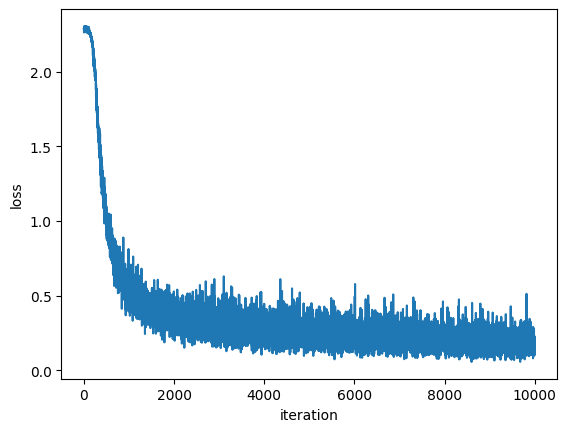

train acc, test acc | 0.9469333333333333, 0.9466


In [3]:
# 그래프 그리기
import matplotlib.pyplot as plt

x = np.arange(0, iters_num, 1)
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

# 정확도 계산
train_acc = network.accuracy(x_train, t_train)
test_acc = network.accuracy(x_test, t_test)
print(f"train acc, test acc | {train_acc}, {test_acc}")

#### [그림4-11] 손실 함수 값의 추이 : 1,000회 반복까지의 추이

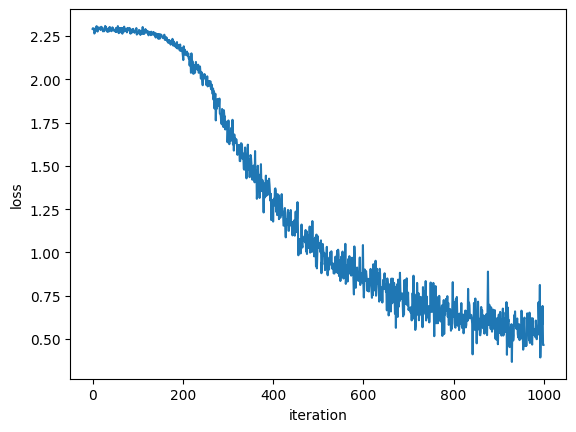

In [4]:
# 그래프 그리기
import matplotlib.pyplot as plt

x = np.arange(0, iters_num - 9000, 1)
plt.plot(x, train_loss_list[:1000])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

여기에서는 미니배치 크기를 100으로 하였다. 즉, 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터 (이미지 데이터와 정답 레이블 데이터)를 추려낸다. 그리고 그 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행하여 매개변수를 갱신하는 것이다. 경사법에 의한 갱신 횟수 (반복 횟수)를 10,000번으로 설정하고, 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가한다. 이 손실 함수의 값이 변화하는 추이를 그래프로 나타내면 [그림4-10]처럼 된다.

[그림4-10]을 보면 학습 횟수가 늘어가면서 손실 함수의 값이 줄어든다. 이는 학습이 잘 되고 있다는 뜻으로, 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다. 바로 신경망이 학습하고 있는 것이다. 다시 말해 데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가서고 있는 것이다!

### 4.5.3 시험 데이터로 평가하기
[그림4-10]의 결과에서 학습을 반복함으로써 손실 함수의 값이 서서히 내려가는 것을 확인하였는가? 이때의 손실 함수의 값이란, 정확히는 '훈련 데이터의 미니배치에 대한 손실 함수'의 값이다. 훈련 데이터의 손실 함수 값이 작아지는 것은 신경망이 잘 학습하고 있다는 방증이지만, 이 결과만으로는 다른 데이터셋에도 비슷한 실력을 발휘할지는 확실하지 않다.

신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해야 한다. 다른 말로 과적합을 일으키지 않는지 확인해야 한다. 과적합되었다는 것은, 예를 들어 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 제대로 식별하지 못한다는 뜻이다.

신경망 학습의 원래 목표는 범용적인 능력을 익히는 것이다. 범용 능력을 평가하려면 훈련 데이터에 포함되지 않은 데이터를 사용해 평가해야 한다. 이를 위해 다음 구현에서는 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록하도록 한다. 여기에서는 1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록한다.

$\textbf{NOTE}$     
> $\small \textbf{에폭}^{\text{epoch}}$은 하나의 단위이다. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 예컨대 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 '소진'한 게 된다. 이 경우 100회가 1에폭이 된다.

$\textbf{SELF NOTE}$        
> $\small \textbf{에폭}^{\text{epoch}}$ 의 좀 더 정확한 해석은 다음과 같다. 먼저 예를 들어보자. 전체 훈련 데이터셋이 60,000개의 데이터로 이루어져 있다고 할때, 미니 배치 크기를 100개로 놓게 되면 전체 훈련 데이터셋에 대해서 모형을 훈련시킬 때 통계적으로 보았을 때 600개의 미니배치가 필요하게 된다. 즉, 미니 배치 크기를 100으로 놓는 경우에, 확률적 경사 하강법을 600회 반복하게 되면 모든 훈련 데이터를 '소진'한 게 된다. 이 때 600회의 반복이 1에폭이 된다.

> 다만, 말 그대로 확률적 경사 하강법이기에, 600회의 반복을 한다고 해서 반드시 모든 훈련데이터셋이 각 미니배치에 대해 포함되는 경우가 보장되지는 않는다. 즉 각 미니배치에 대해서 훈련데이터셋이 중복되어 포함되는 경우가 존재한다. 그러나 각 반복에서 무작위로 100개의 데이터를 선택하므로, 모든 데이터가 고르게 선택될 가능성이 있으며, 600회의 반복 후에는 전체 데이터셋이 대략적으로 한 번씩 선택되었을 것으로 기대할 수 있다. 즉, 전체 60,000개의 데이터셋에 대해서 600회의 반복이 지난후에 사용된 데이터의 개수의 기댓값이 전체 데이터셋 60,000개와 같은 것이다. 그러므로 많은 수의 반복과 에폭을 거치면서 모든 데이터가 비슷한 빈도로 사용될 가능성이 높아지고 이는 $\small \textbf{대수의 법칙}^{\text{Law of Large Number}}$에 기반한 논리와 같다.

그럼 평가가 제대로 이뤄질 수 있도록 앞의 구현으로부터 조금만 수정해보자.

In [6]:
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"{(i)}번째 반복, train acc, test acc | {train_acc}, {test_acc}")



0번째 반복, train acc, test acc | 0.11236666666666667, 0.1135
600번째 반복, train acc, test acc | 0.7911666666666667, 0.7975
1200번째 반복, train acc, test acc | 0.8778666666666667, 0.8822
1800번째 반복, train acc, test acc | 0.8972, 0.9012
2400번째 반복, train acc, test acc | 0.9068666666666667, 0.9116
3000번째 반복, train acc, test acc | 0.9136666666666666, 0.9171
3600번째 반복, train acc, test acc | 0.91935, 0.9211
4200번째 반복, train acc, test acc | 0.9244833333333333, 0.9256
4800번째 반복, train acc, test acc | 0.9288333333333333, 0.931
5400번째 반복, train acc, test acc | 0.9321833333333334, 0.9332
6000번째 반복, train acc, test acc | 0.9356666666666666, 0.9365
6600번째 반복, train acc, test acc | 0.93815, 0.9379
7200번째 반복, train acc, test acc | 0.9408666666666666, 0.9401
7800번째 반복, train acc, test acc | 0.9427333333333333, 0.9409
8400번째 반복, train acc, test acc | 0.9448166666666666, 0.9429
9000번째 반복, train acc, test acc | 0.94735, 0.9454
9600번째 반복, train acc, test acc | 0.9486, 0.9465


이 예에서는 1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고, 그 결과를 기록한다. 정확도를 1에폭마다 계산하는 이유는 for 문 안에서 매번 계산하기에는 시간이 오래 걸리고, 또 그렇게까지 자주 기록할 필요도 없기 때문이다. 더 큰 관점에서 그 추이를 알 수 있으면 충분하다.

#### [그림4-12] 훈련 데이터와 시험 데이터에 대한 정확도 추이

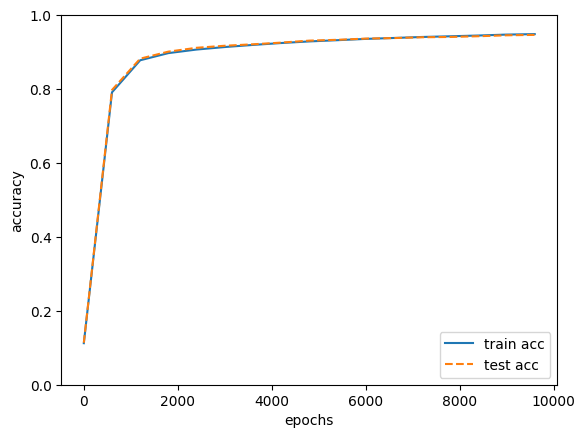

In [7]:
# 정확도 그래프 그리기

x = np.arange(0, iters_num, iter_per_epoch)
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

[그림4-12]에서는 훈련 데이터에 대한 정확도를 실선으로, 시험 데이터에 대한 정확도를 점선으로 그렸다. 보다시피 에폭이 진행될수록 (학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있다. 또, 두 정확도에는 차이가 없음을 알 수 있다.(두 선이 거의 겹쳐져 있다) 다시 말해 이번 학습에서는 과적합이 일어나지 않은 것이다.

## 4.6 정리
이번 장에서는 신경망 학습에 대해서 다뤄보았다. 가장 먼저 신경망이 학습을 수행할 수 있도록 손실 함수라는 '지표'를 도입했다. 이 손실 함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것이 신경망 학습의 목표이다. 또, 가능한 한 작은 손실 함수의 값을 찾는 수법으로 경사법을 소개하였다. 경사법은 함수의 기울기를 이용하는 방법이다.

#### 이번 장에서 배운 내용
- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 오차역전파법은 기울기를 고속으로 구할 수 있다.